# Introduction

This dataset was aquired in HuggingFace [here](https://huggingface.co/datasets/utbuiquoc/forest_health_data_with_target).

Since this data set did not have any information about the variables, I did some research and created data_description.txt to explain the meaning behind each variable.

# Opening and understanding the dataset

In [ ]:
import os
import pandas as pd
import numpy as np
os.chdir(r"H:\Mi unidad\00 MACHINE LEARNING\01 Forest Health")
data = pd.read_csv("forest.csv")
data

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,13.663283,-84.013139,87.203097,14.378997,9.076576,7.159918,26.088170,892.162899,23.022532,88.612479,0.365851,0.007299,0.470416,0.215047,2.127209,1.030366,0.317082,0.621856,Unhealthy
996,997,46.692543,-63.036977,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,Healthy
997,998,15.472745,-125.172939,34.429847,13.048025,3.950586,7.886340,41.020960,1420.453374,39.219948,95.736633,0.701670,0.157126,0.434471,0.251479,0.628099,3.868748,0.661191,0.725692,Healthy
998,999,48.009494,-126.006170,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,Very Healthy


After opening the data, using the python function .info() I get to see a small summary of the dataframe.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Temperature              1000 non-null   float64
 10  Humidity                 1000 non-null   float64
 11  Soil_TN                  1000 non-null   float64
 12  Soil_TP                  1000 non-null   float64
 13  Soil_AP                  1000 non-null   float64
 14  Soil_AN                  

At first glance, the are not any missing values and it seems the data in the variables is valid.

# Getting ready

Here are collected all the libraries and installs needed to execute the code.

In [ ]:
!pip install bioinfokit

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install xgboost

In [ ]:
# Downgrading scikit-learnt to ensure the compatibility with some functions in XGBoost
!pip install scikit-learn==1.5.2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder
from bioinfokit.analys import stat
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Types of variables

I split in two groups the features that seem (glancing the data type in the columns) numeric and the categoric ones.

In [ ]:
num_col = data.select_dtypes(include = ['number']).columns
cat_col = data.select_dtypes(include = ['object']).columns
print( "\nNumerical Columns :" , num_col.tolist())
print( "\nCategorical Columns :" , cat_col.tolist())


Numerical Columns : ['Plot_ID', 'Latitude', 'Longitude', 'DBH', 'Tree_Height', 'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope', 'Elevation', 'Temperature', 'Humidity', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN', 'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level', 'Fire_Risk_Index']

Categorical Columns : ['Health_Status']


## Categorical Variables

In [ ]:
for c  in cat_col:
    col_cnt= data[c].nunique()
    print(f"{c} has {col_cnt} unique values.")

Health_Status has 4 unique values.


In [ ]:
for i in cat_col:
    print (f'Value Count for {i}')
    print(data[i].value_counts())

Value Count for Health_Status
Health_Status
Healthy         441
Unhealthy       322
Very Healthy    156
Sub-healthy      81
Name: count, dtype: int64


As seen in data.info() by the object type of data, there is only one categorical variable: "Health_Status".

I assessed the option of balancing the data by applying a SMOTE before modeling (I did not do that, but left the code anyway in case it was used).

I am going to analyze if any of the numeric variables is really a categoric variable in a number form.


The is another option for this data set: any of the other continous numeric variables could be used as target to work with regressor models.

In [ ]:
# I could use the same code as above to see if any of the other numeric variables are categoric or continous
for n in num_col:
    col_cnt= data[c].nunique()
    print(f"{c} has {col_cnt} unique values.")

for i in num_col:
    print (f'Value Count for {i}')
    print(data[i].value_counts())

Example with 'Fire_Risk_Index':

In [ ]:
# See the categories there are and how many of them
data['Fire_Risk_Index'].value_counts()

# See how many categoies has that numeric variable
len(data['Fire_Risk_Index'].unique())

1000

I use "Fire_Risk_Index" because a variable called index could mean it is a categoric variable in integer form. In this case is a decimal number with 1000 entries, keeping in mind the dataset has 1000 entries, I am sure to say it is not categoric. This variable could be used as the dataset index if that would help to solve the problem faced in the data.  

As explained before, I could use "Fire_Risk_Index" instead of "Health_Status" as target in regression models.

In [ ]:
# Example of how to order the dataframe by "Fire_Risk_Index", dataset name is changed to prevent the change from happening
data_fire = data2.sort_values(by='Fire_Risk_Index')
data_fire.set_index('Fire_Risk_Index', inplace=True)

## Numeric Variables - Stadistic Summary

In [ ]:
# Make an random sample of each class in target
sample_data  = data.groupby("Health_Status").sample(frac=0.2, random_state= 8).reset_index(drop = True)

In [ ]:
data.describe()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207
std,288.819436,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458
min,1.000000,10.185281,-129.774722,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854
25%,250.750000,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123
50%,500.500000,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573023,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489
75%,750.250000,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163
max,1000.000000,49.988707,-60.041039,99.792981,29.987616,9.979745,9.994153,44.975731,2996.823629,39.860447,99.960415,0.999676,0.499671,0.499356,0.499428,2.999513,4.999699,0.999150,0.997163


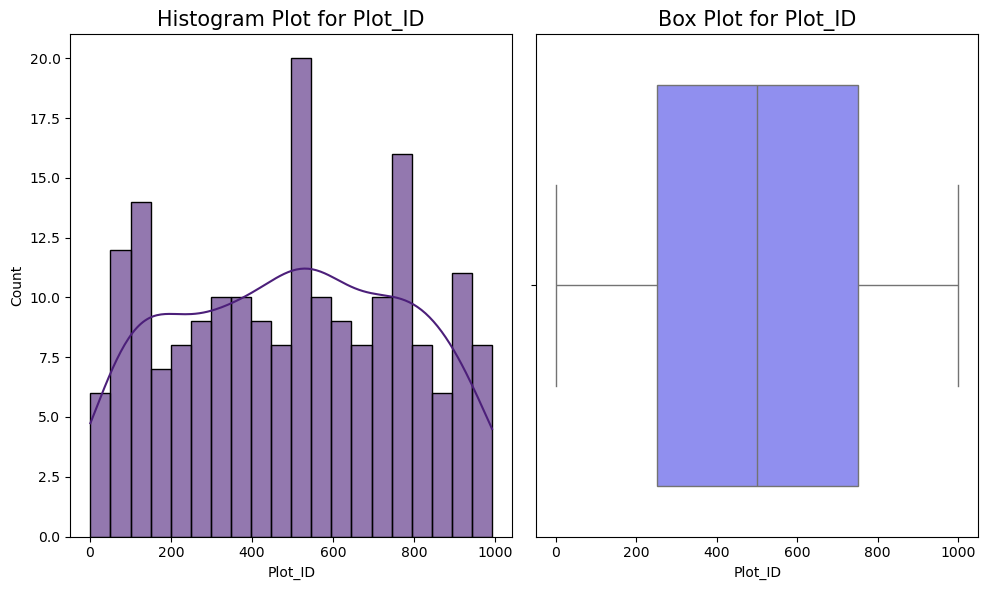

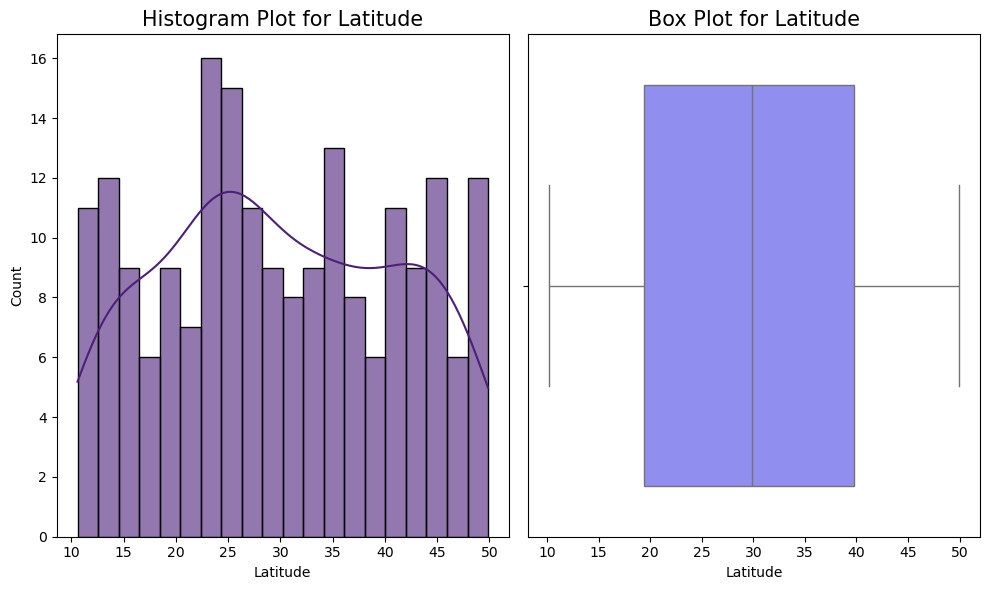

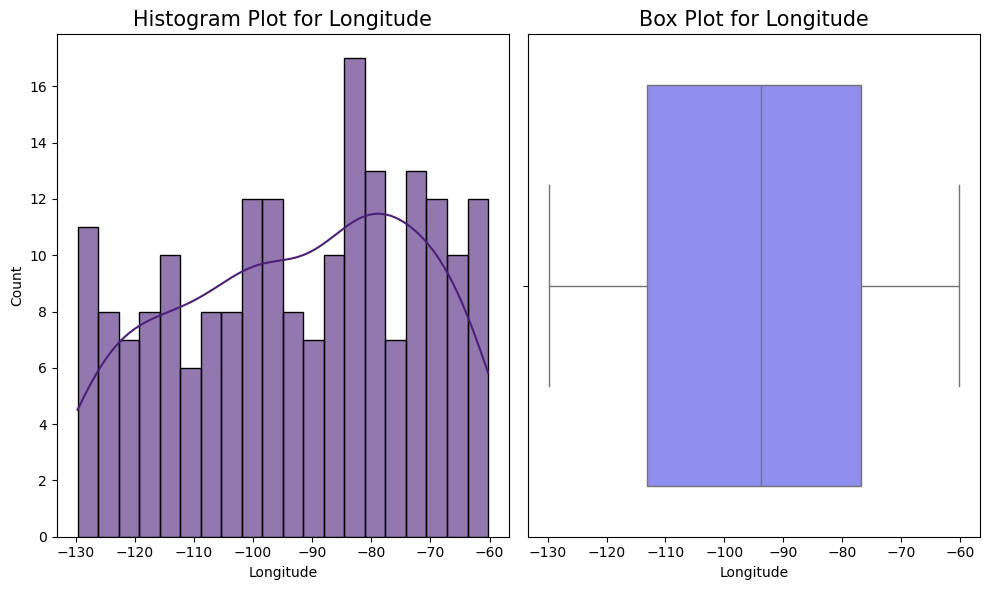

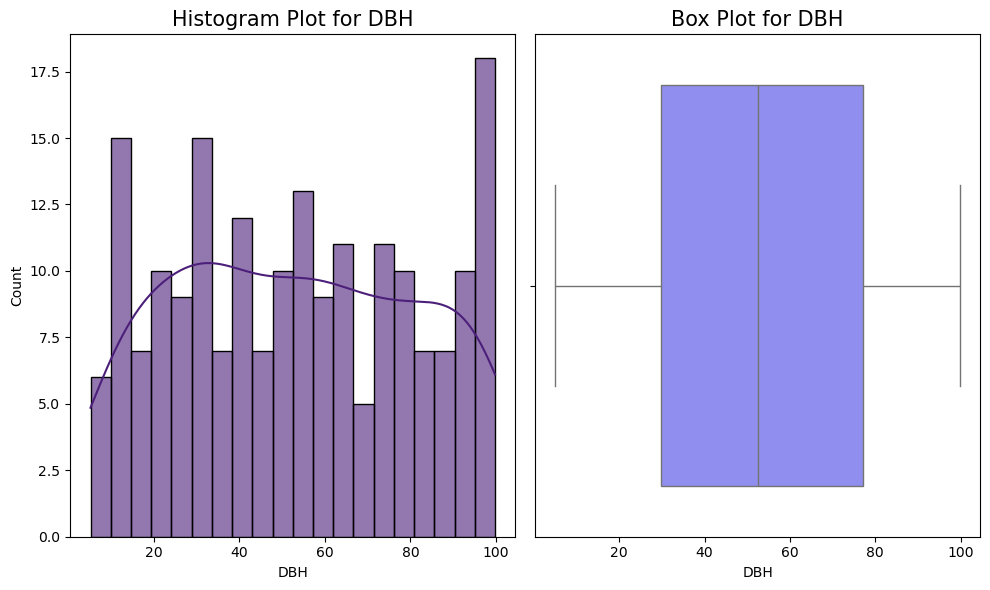

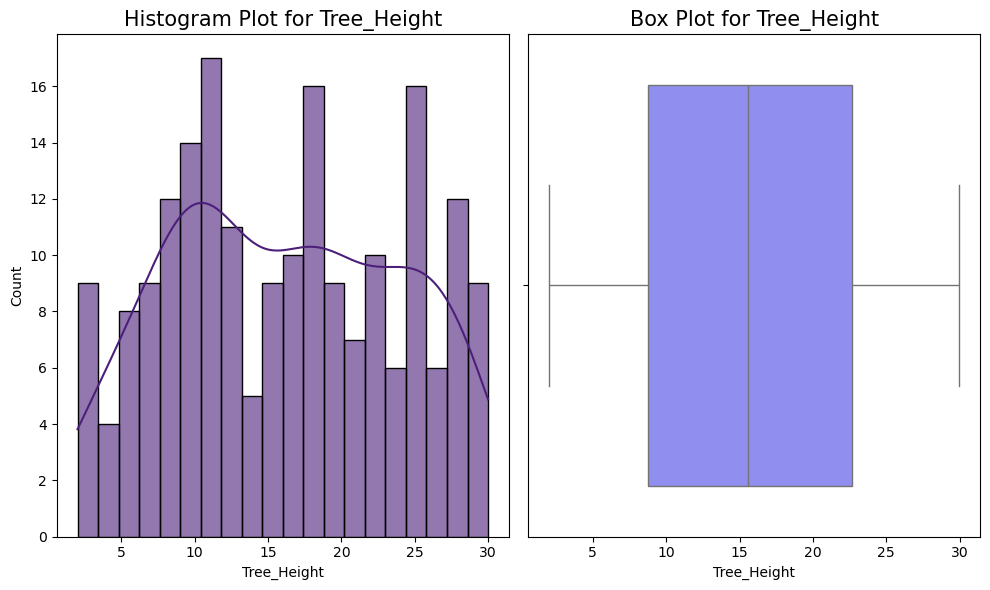

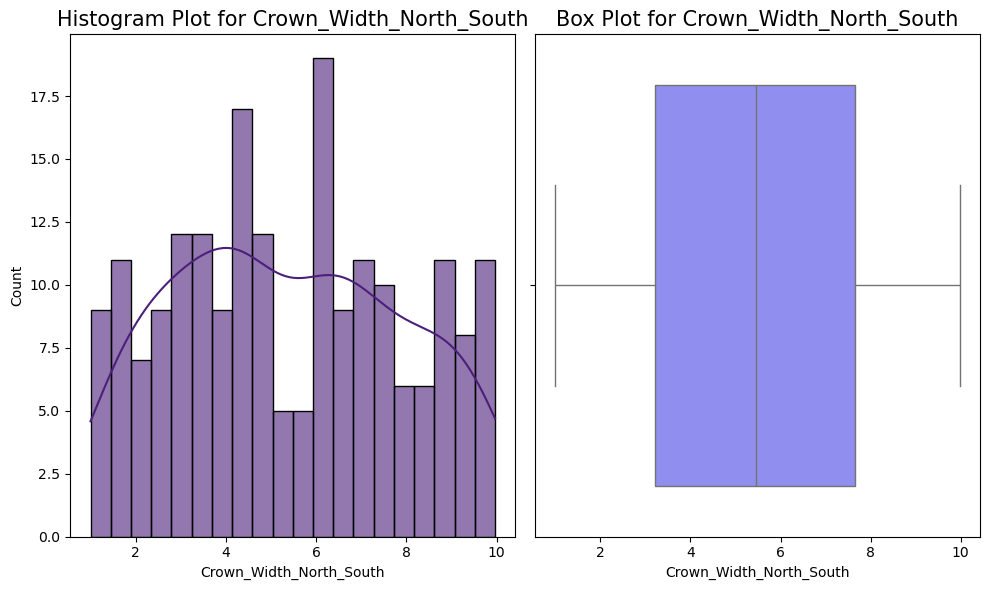

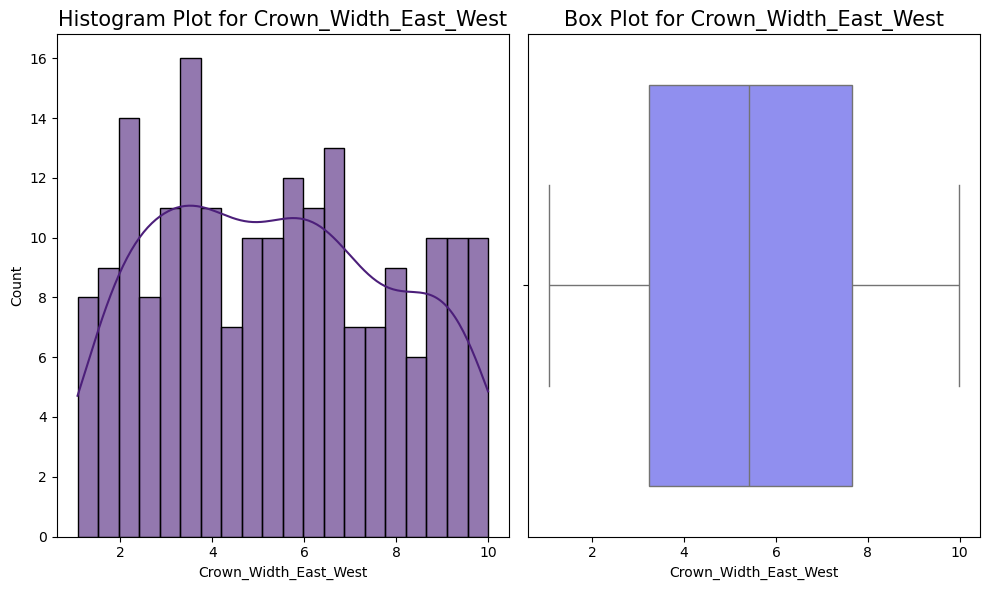

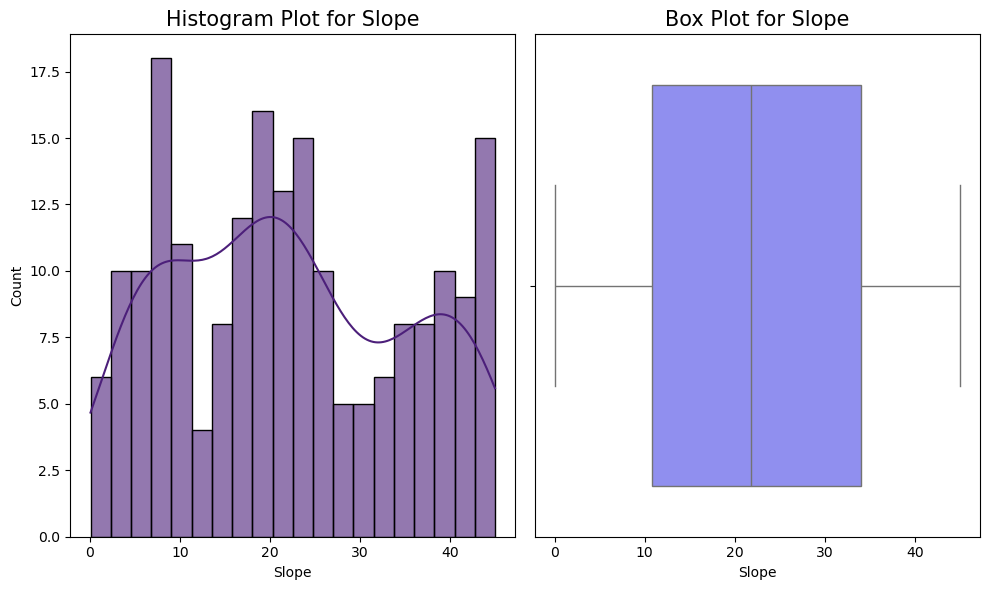

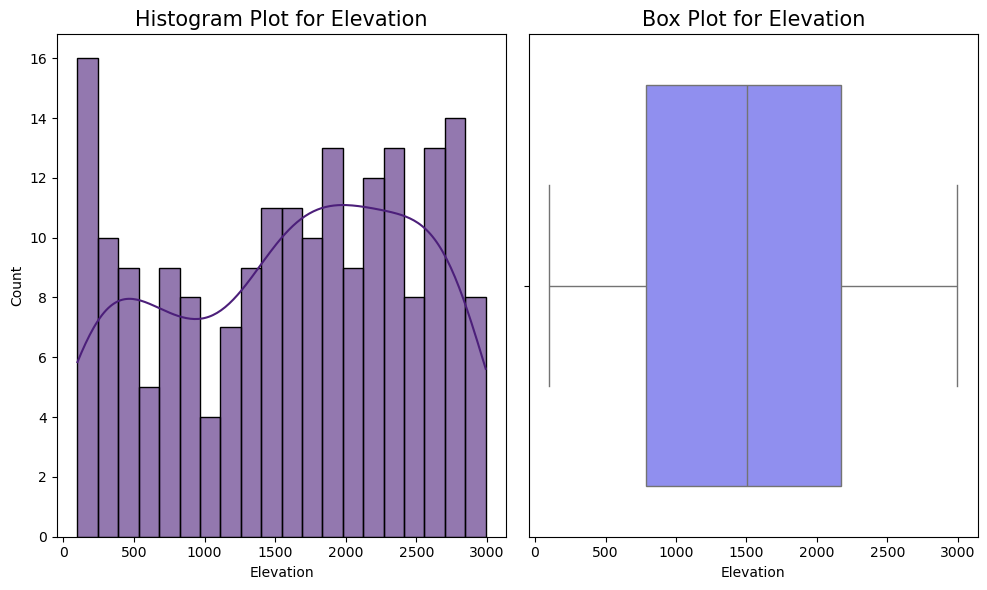

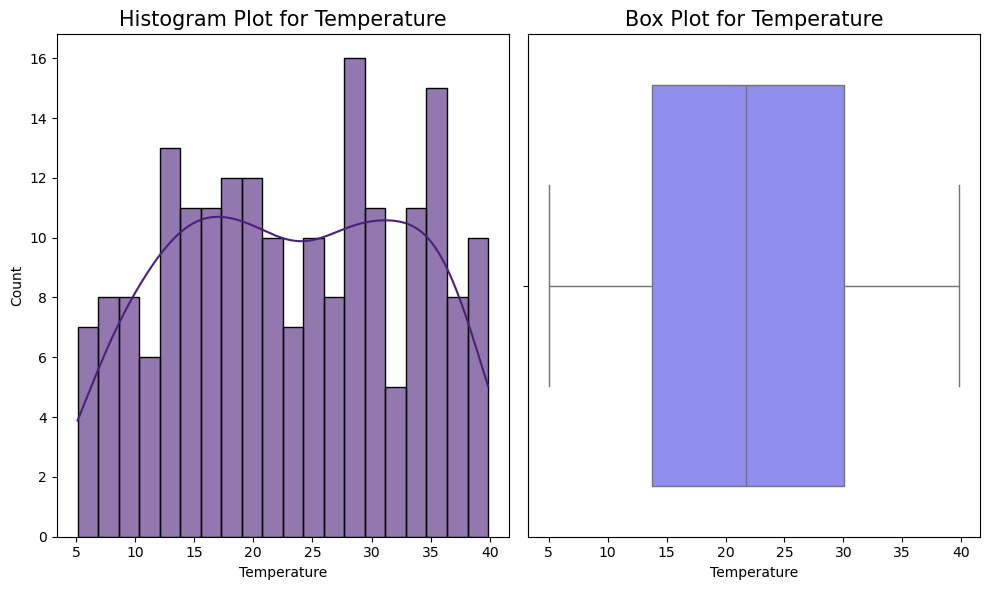

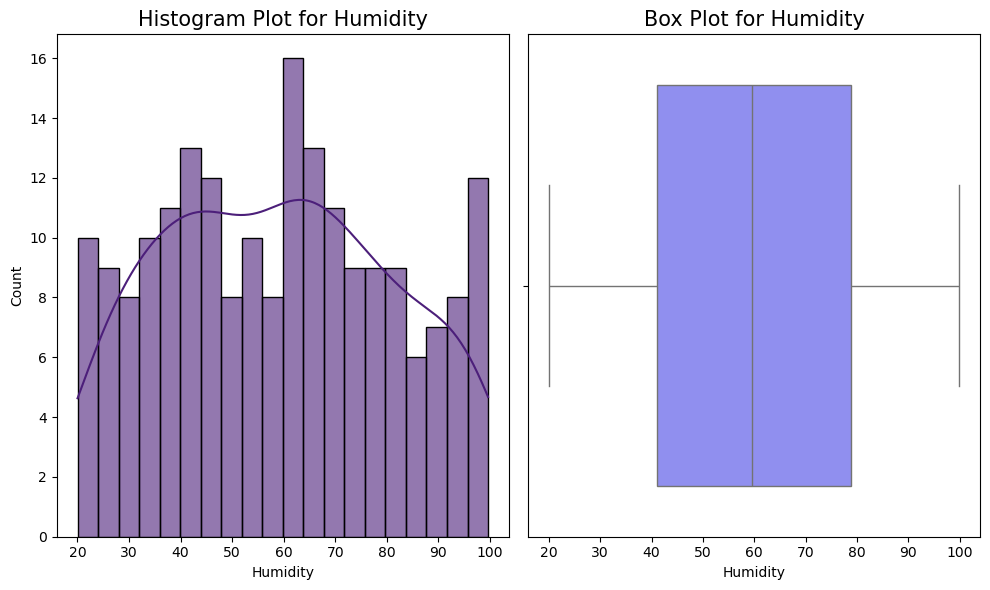

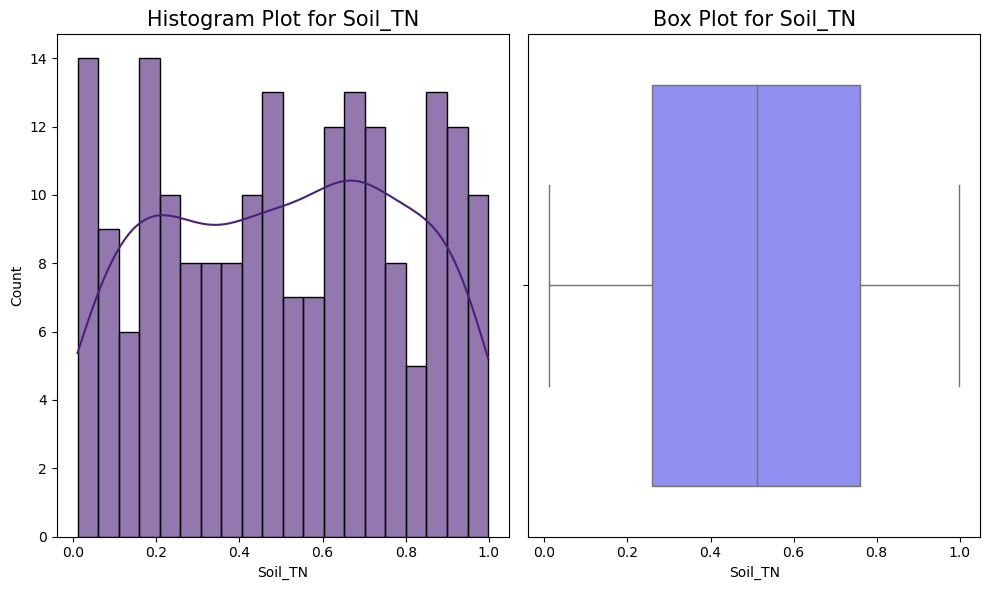

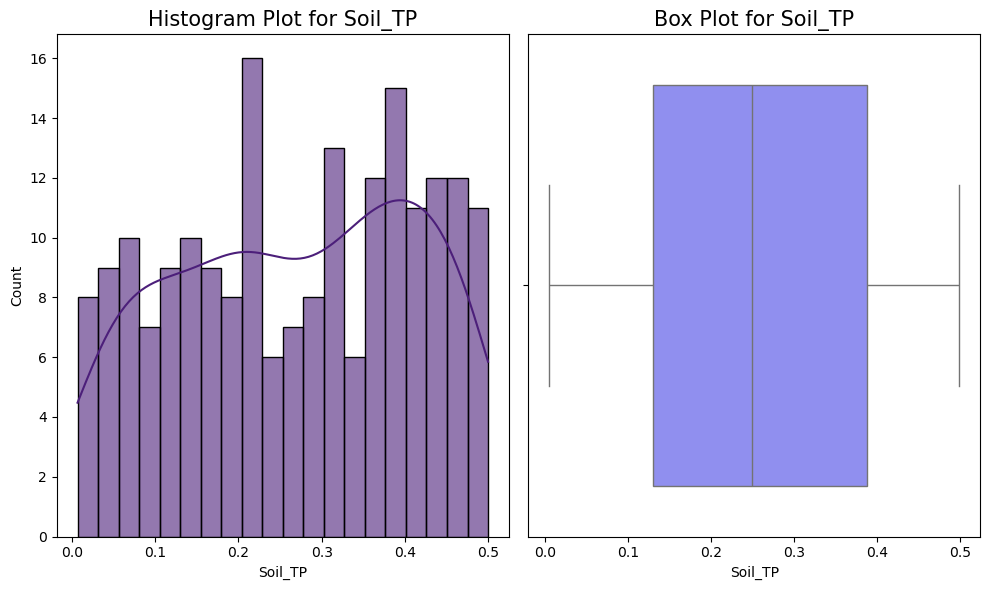

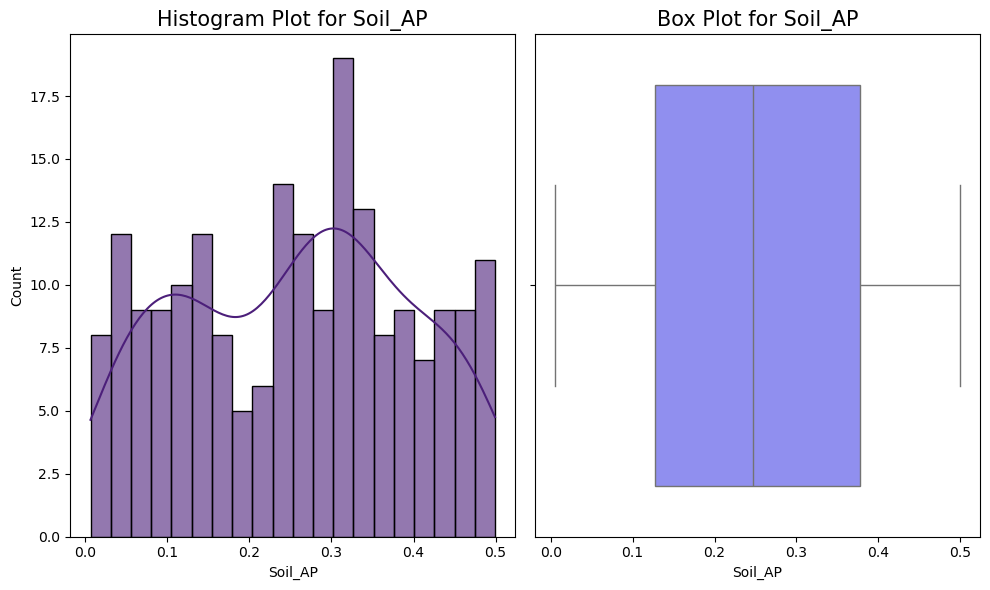

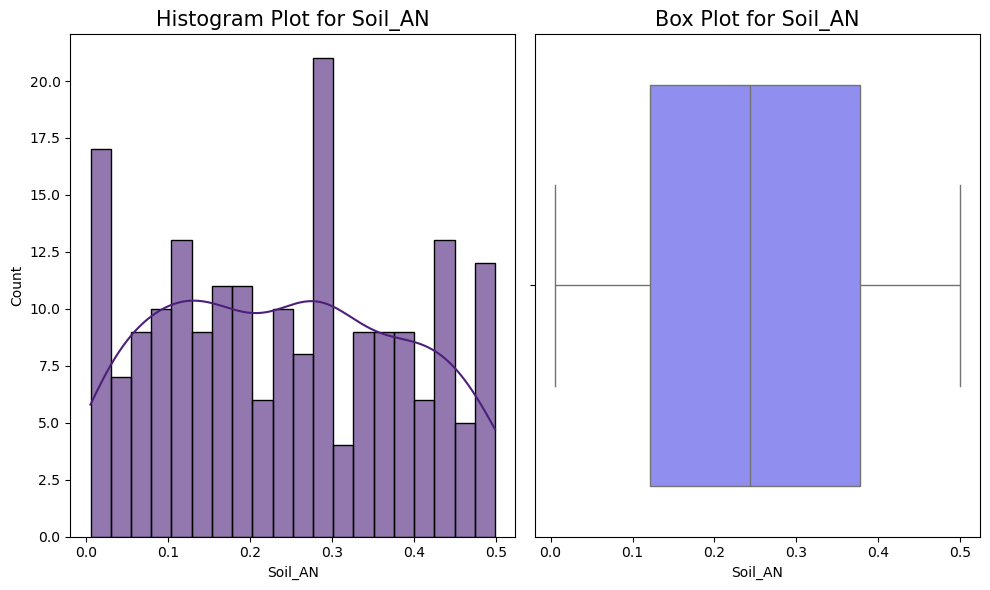

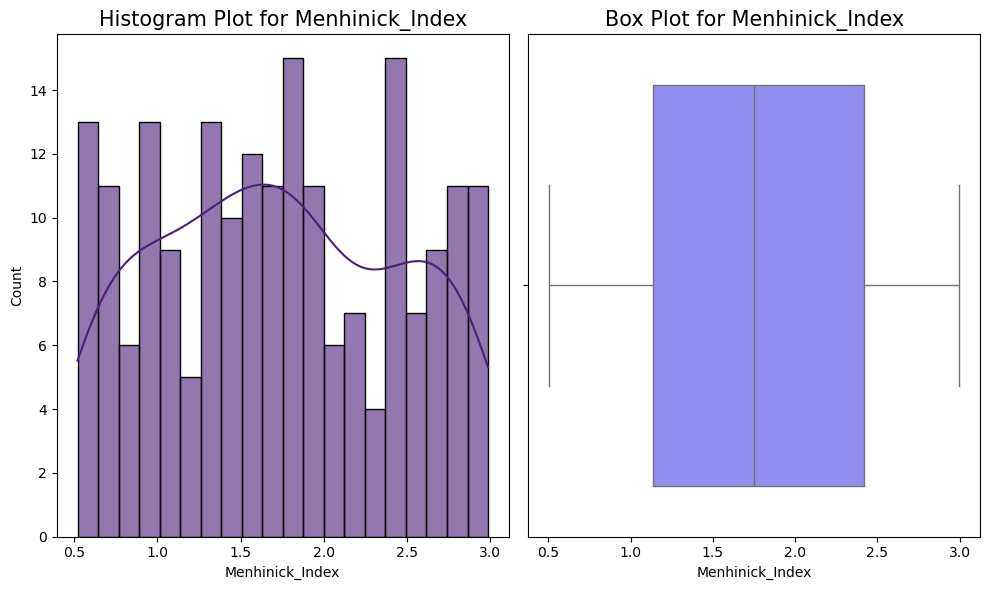

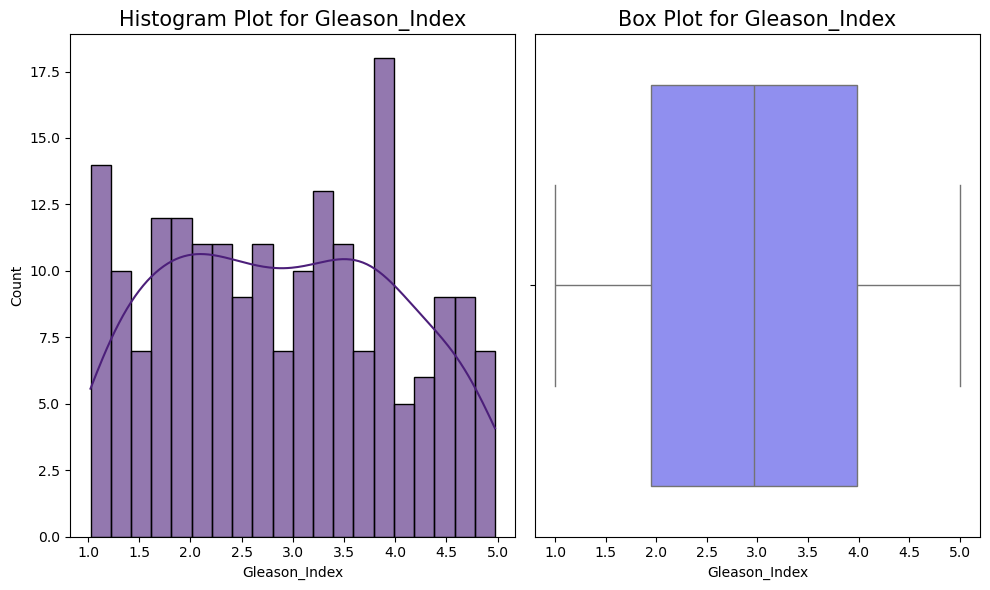

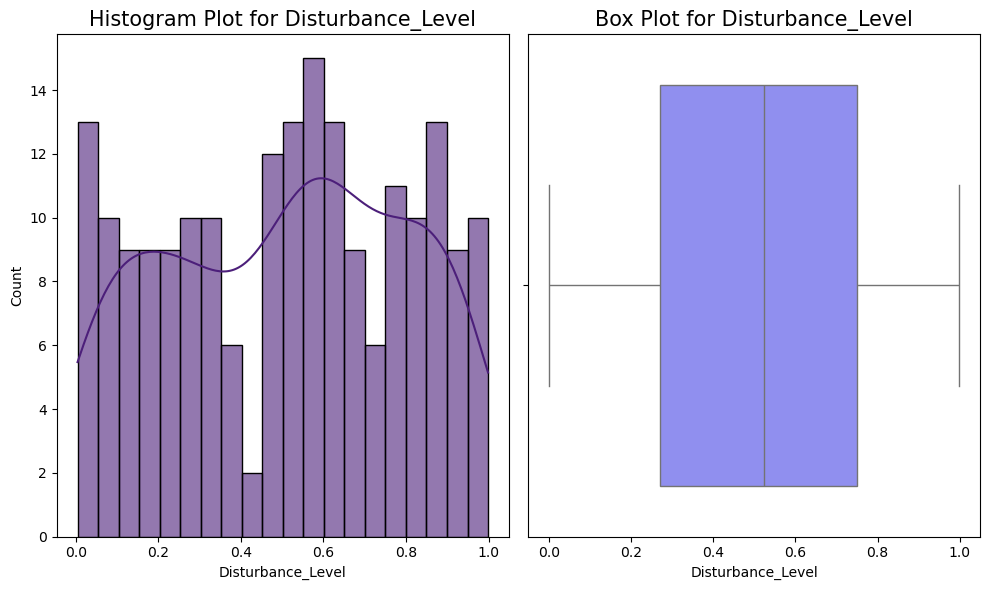

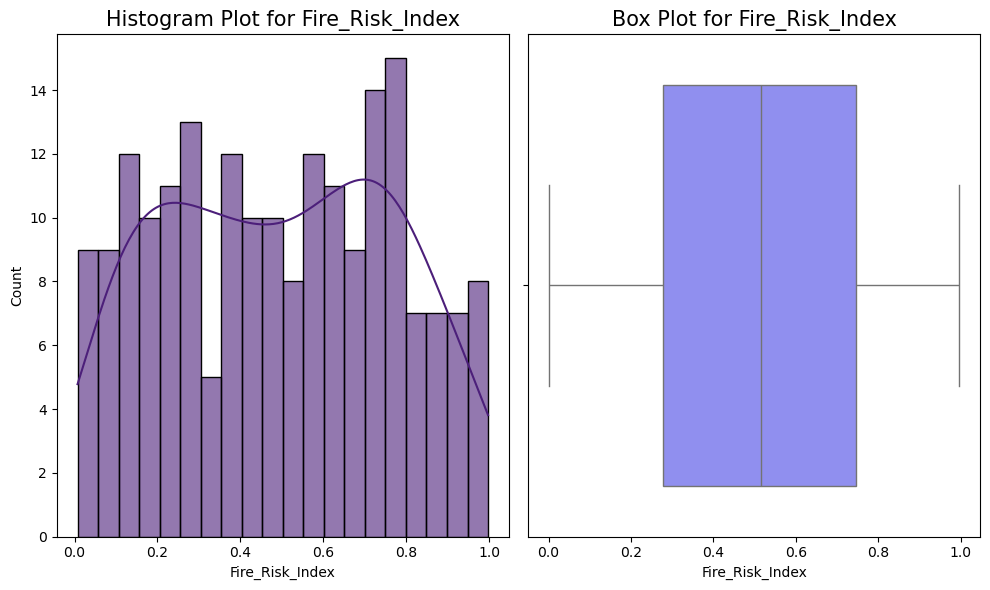

In [ ]:
for i in num_col:
    fig , axes = plt.subplots(1,2 ,figsize= (10,6))
    # HistPlot
    sns.histplot(sample_data , x=i ,bins= 20,kde=True ,color ='#4C1F7A' ,edgecolor = 'black', alpha =0.6 ,ax= axes[0])
    axes[0].set_title(f"Histogram Plot for {i}" , fontsize = 15)
    axes[0].set_xlabel(i , fontsize=10)
    # BoxPlot
    sns.boxplot(data , x=i ,palette= 'cool', ax = axes[1])
    axes[1].set_title(f"Box Plot for {i}" , fontsize = 15)
    axes[1].set_xlabel(i , fontsize=10)
    plt.tight_layout()
    plt.show()

No outliers found in any variable, all the values are found inside range.

# Data Cleansing

At this stage I clean the data:
- How I would treat missing values if any.
- Duplicated entries if any.
- Error mending if necessary.

In [ ]:
# See missing values
data.isnull().sum()

Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Temperature                0
Humidity                   0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64

In [ ]:
# See duplicated entries
data.duplicated().sum()

0

No missing values of duplicated entries.

#### Missing Values

How I would treat missing values if they were present in the dataset.

Dataset name is changed so it will break if executed.

In [ ]:
# See total missing values
sum(data2.isnull().sum())

# See missing values per variable
nan_variable = data2.isnull().sum()
nan_variable = nan_variable[nan_variable>0]
print("Missing values per variable:\n", nan_variable)

In [ ]:
# Imputing the mean for missing values
data3 = data2.fillna(data2.select_dtypes(include=[float, int]).mean())

In [ ]:
# Imputing the missing values using multiple impute

# Restart LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder only to categoric colummns
for column in data2.select_dtypes(include=['object']).columns:
    data2[column] = label_encoder.fit_transform(data2[column])

# It would be needed to import these libraries:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Restart IterativeImputer
imputer = IterativeImputer(random_state=0)

# Apply the IterativeImputer to dataset
data3 = imputer.fit_transform(data2)

# Transform result into dataframe
data3 = pd.DataFrame(data3, columns=data2.columns)

#### Duplicated entries

This line would be used if any duplicated entries were found, it is not this case, no need to execute this line.

In [ ]:
# Eliminar filas duplicadas
data2 = data2.drop_duplicates()

#### Outliers

This code is written after seing there are not outliers in the data I am working with, so I already know there are not any. Dataset name changed to prevent the code from altering the dataset.


In [ ]:
# Filter all numeric type data
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data3 = data2.select_dtypes(include=num)

In [ ]:
# Check if any numeric data is really numeric and which are numeric form categoric data

# Filter categoric columns
col_num = data.select_dtypes(include=['number']).columns

# Analyze columns with few unique values to identify if they are categoric
cat_col = [col for col in col_num if data[col].nunique() < 10]

I would see with a boxplot the values of the different columns to identify which variables have outliers or not and if they are found I would:
- Identify them with IQR method.
- Examing the variables with outliers and try to explain the origin.
- Delete the outliers resulting from errors in the data entry.
- Transform the outliers into NaN to process them after.